# 3) Taking any two classes from the above data, add labels to them (0 or 1) and create a new csv file. Split the data into Train / Test set as 70/30. 

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Read the CSV file containing the data
df = pd.read_csv('random_circle_points.csv')

# Select only points from the first two circles
filtered_df = df[df['Circle'].isin(['Center (3,3) Radius 2', 'Center (7,7) Radius 2'])]

# Map circles to labels
label_mapping = {'Center (3,3) Radius 2': 0, 'Center (7,7) Radius 2': 1}
filtered_df['Label'] = filtered_df['Circle'].map(label_mapping)

# Split the data into features and target label
X = filtered_df[['X', 'Y']]
y = filtered_df['Label']

# Split the data into train and test sets (70/30 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Create train and test DataFrames
train_df = pd.DataFrame(X_train, columns=['X', 'Y'])
train_df['Label'] = y_train

test_df = pd.DataFrame(X_test, columns=['X', 'Y'])
test_df['Label'] = y_test

# Save to CSV
train_df.to_csv('train_data.csv', index=False)
test_df.to_csv('test_data.csv', index=False)

print("Training data sample:")
print(train_df)

print("Testing data sample:")
print(test_df)

Training data sample:
           X         Y  Label
11  7.129512  7.828781      1
3   1.410497  2.639846      0
18  8.441727  7.016034      1
16  5.297181  7.241419      1
13  7.018155  5.432549      1
2   2.259892  2.631778      0
9   2.272646  1.340705      0
19  8.788884  6.610329      1
4   4.201735  2.827138      0
12  8.087771  7.105541      1
7   2.809324  2.946669      0
10  5.844413  5.785785      1
14  6.086370  7.031003      1
6   2.069055  3.136705      0
Testing data sample:
           X         Y  Label
0   2.411757  1.669759      0
17  5.782069  7.507464      1
15  7.329507  5.193544      1
1   3.465040  2.657298      0
8   2.680554  2.025037      0
5   4.389560  4.320133      0


C:\Users\Partha Sakha Paul\AppData\Local\Temp\ipykernel_22340\1869012364.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Label'] = filtered_df['Circle'].map(label_mapping)


# (a) Plot the decision boundary using the developed logistic regression code (either with or without regularization) from one of your previous labs. 

The learned parameters are [-10.04202846   0.69157376   1.60601353]


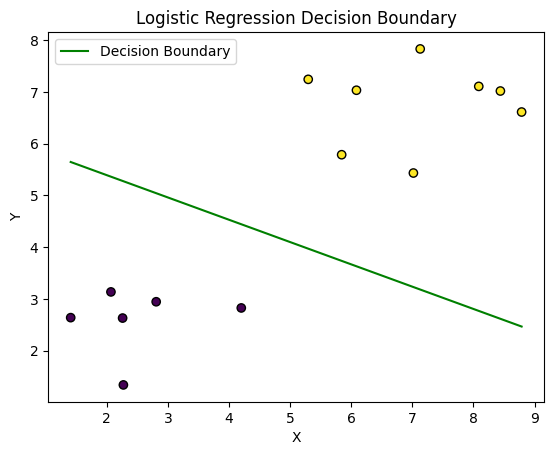

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Load the dataset from a CSV file into a pandas DataFrame.
df = pd.read_csv('train_data.csv')

# Extract features 'X' and 'Y' into X, and the target variable 'Label' into y.
X = df[['X', 'Y']].values
y = df['Label'].values

# Add an intercept term (column of ones) to the features, necessary for incorporating the bias term in logistic regression models.
X = np.hstack((np.ones((X.shape[0], 1)), X))

# Define the sigmoid function, which serves as the activation function for logistic regression.
def sigmoid(z):
    return 1 / (1 + np.exp(-z))  # The sigmoid function transforms any value to the (0,1) interval, which is useful for binary classification.

# Define the cost function for logistic regression using the sigmoid function.
def cost_function(theta, X, y):
    m = len(y)  # Number of training examples.
    predictions = sigmoid(X @ theta)  # Calculate the predicted probabilities using the current values of theta.
    error = (-y * np.log(predictions)) - ((1 - y) * np.log(1 - predictions))  # Compute the logistic loss.
    cost = 1/m * sum(error)  # Calculate the average cost across all examples.
    gradient = 1/m * X.T @ (predictions - y)  # Compute the gradient of the cost function.
    return cost, gradient

# Implement gradient descent to find the optimal parameters for the logistic regression model.
def gradient_descent(X, y, theta, alpha, iterations):
    costs = []  # List to store the cost at each iteration, useful for monitoring convergence.
    for i in range(iterations):
        cost, gradient = cost_function(theta, X, y)  # Compute cost and gradient for current theta.
        theta -= (alpha * gradient)  # Update theta by moving against the gradient, scaled by the learning rate.
        costs.append(cost)  # Store the cost.
    return theta, costs

# Initialize parameters (theta), learning rate (alpha), and the number of iterations for gradient descent.
theta = np.zeros(X.shape[1])  # Start with zero initialization for theta.
alpha = 0.01  # Set learning rate.
iterations = 50000  # Set the number of iterations

# Run the gradient descent algorithm to learn the optimal parameters.
theta, costs = gradient_descent(X, y, theta, alpha, iterations)
print('The learned parameters are', theta)  # Output the learned parameters after training.

# Plotting section
# Plot the original data points, colored by their labels.
plt.scatter(X[:, 1], X[:, 2], c=y, cmap='viridis', edgecolors='k')  # Color points based on their label for better visualization.

# Calculate and plot the decision boundary. The decision boundary is where the model output is 0.5, which translates to 0 = theta_0 + theta_1*x1 + theta_2*x2.
x_value = np.array([np.min(X[:, 1]), np.max(X[:, 1])])  # Range of x values.
y_value = -(theta[0] + theta[1] * x_value) / theta[2]  # Solve for x2 to plot the decision boundary.
plt.plot(x_value, y_value, "g", label='Decision Boundary')  # Plot the decision boundary as a green line.

# Add labels, title, and legend to the plot.
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Logistic Regression Decision Boundary')
plt.legend()

# Display the plot.
plt.show()

# (b) Evaluate the metrics such as Precision, Recall, F1-Score and Accuracy on the test data without using any library

In [17]:
import numpy as np
import pandas as pd

# Load data from a CSV file and prepare it for logistic regression
def prepare_test_data(filename):
    # Read the data from the specified CSV file
    df = pd.read_csv(filename)
    # Extract the feature columns 'X' and 'Y'
    X = df[['X', 'Y']].values
    # Extract the label column 'Label'
    y = df['Label'].values
    # Add an intercept term (column of ones) to the feature matrix for the bias term in the logistic model
    X = np.hstack((np.ones((X.shape[0], 1)), X))
    return X, y

# Predict class labels using logistic regression parameters
def predict(theta, X):
    # Calculate the logistic regression model output (logit)
    prob = sigmoid(X @ theta)
    # Convert probabilities to class labels (0 or 1) using a threshold of 0.5
    return (prob >= 0.5).astype(int)

# Calculate Precision, Recall, F1-Score, and Accuracy metrics
def evaluate_metrics(y, y_pred):
    # Count true positives
    true_positives = np.sum((y == 1) & (y_pred == 1))
    # Count true negatives
    true_negatives = np.sum((y == 0) & (y_pred == 0))
    # Count false positives
    false_positives = np.sum((y == 0) & (y_pred == 1))
    # Count false negatives
    false_negatives = np.sum((y == 1) & (y_pred == 0))
    
    # Calculate precision (TP / (TP + FP))
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    # Calculate recall (TP / (TP + FN))
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    # Calculate F1-score (harmonic mean of precision and recall)
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
    # Calculate accuracy ((TP + TN) / total)
    accuracy = (true_positives + true_negatives) / len(y)
    
    return precision, recall, f1_score, accuracy

# Load and prepare test data for evaluation
X_test, y_test = prepare_test_data('test_data.csv')

# Predict labels for the test data using the learned parameters
y_pred = predict(theta, X_test)

# Evaluate and print out the performance metrics of the model
precision, recall, f1_score, accuracy = evaluate_metrics(y_test, y_pred)
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1-Score: {f1_score:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Precision: 1.00
Recall: 1.00
F1-Score: 1.00
Accuracy: 1.00
